In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4431872/4422102 [==============================] - 15s 3us/step


Image Label : 6


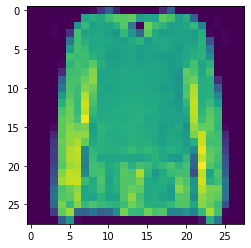

In [6]:
imgIndex = 18
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [7]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=50, 
                    validation_data=(xvalid, yvalid))

Epoch 1/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0721 - accuracy: 0.5793 - val_loss: 1.1331 - val_accuracy: 0.5670
Epoch 2/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0561 - accuracy: 0.5876 - val_loss: 1.1353 - val_accuracy: 0.5566
Epoch 3/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0460 - accuracy: 0.5895 - val_loss: 1.4085 - val_accuracy: 0.4004
Epoch 4/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0345 - accuracy: 0.5932 - val_loss: 1.0123 - val_accuracy: 0.6064
Epoch 5/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0226 - accuracy: 0.5965 - val_loss: 1.0165 - val_accuracy: 0.6120
Epoch 6/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0130 - accuracy: 0.6025 - val_loss: 0.9723 - val_accuracy: 0.6212
Epoch 7/50
1563/1563 [==============================] - 2s 1ms/step - loss: 0.9988 - accuracy: 0.6061 - val_loss: 0.9895 - val_accuracy:

In [18]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 2]
